<a href="https://colab.research.google.com/github/MolkaHaddar/Machine-Learning/blob/main/compte_rendu_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Compte** **Rendu** 

***Partie ajoutés:Lasso,Elbow method,Random forest regression/des commentaires et des interprétations avec plus de visualisation(regplot,displot,la distribution des données d'une variable par rapport à la distribution de densité, le coefficient skew...***

# **Analyse de données**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Charger le fichier 50_startups de type csv dans une variable de type DataFrame à l'aide de la méthode read_csv fournit par la librairie pandas et puis afficher le contenu.

In [ ]:
from google.colab import files
data_to_load = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['50_Startups.csv']))
dataset

Saving 50_Startups.csv to 50_Startups (1).csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Afficher la statistique descriptive de la dataframe à l'aide du méthode describe. le résultat de cette methode est :

Nombre des enregistrement

*   Moyenne
*   Ecart-type
*   Minimum et Maximum
*   1er, 3eme quantile et mediane (2eme quantile)









In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.describe(include="object")

,State
count,50
unique,3
top,New York
freq,17


In [ ]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
dataset.Administration.std()

28017.802755488683

In [ ]:
dataset['Administration'].std()

28017.802755488683

# **Visualisation des données**

La méthode boxplot fournit par la librairie seaborn affiche la boite de moustache pour toutes les variables.

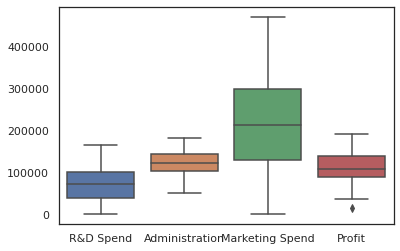

In [ ]:
sns.set(style='white')
sns.boxplot(data=dataset)

On peut afficher la boite de moustache d'une seul variable. Cette figure indique les informations suivantes:

* la ligne inférieure : 1er quantile
* la ligne supérieure : 3eme quantile
* Élément de liste
* la ligne intérieur : 2eme quantile (ou mediane)
* la ligne inferieur au dessous : minimum limite
* la ligne superieur au dessus : maximum limite
* les points dessous minimum limite ou dessus maximum limite : les valeurs    aberants
On peut remarquer qu'on a des valeurs aberrantes (outlayers) au dessous de la limite minimale.

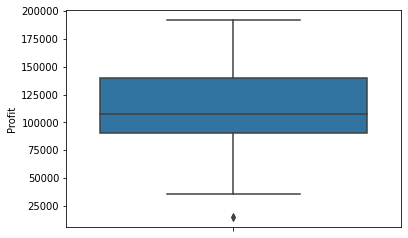

In [ ]:
sns.boxplot(y=dataset.Profit)


On peut afficher les boites de moustache de la variable profit en fonction d'une autre variable (par example profit en fonction de la variable State).

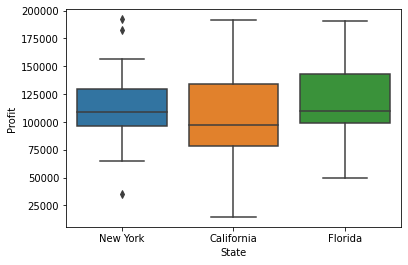

In [ ]:
sns.boxplot(x=dataset.State,y=dataset.Profit)

la corrélation entre les couples profit, administration et profit, marketing spend est trés faible parce que le nuage des points est trés dispersé

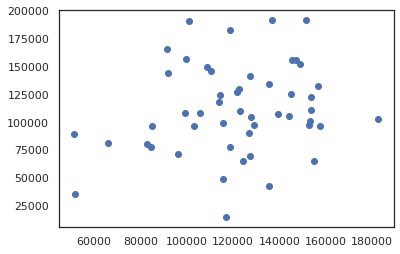

In [ ]:
plt.scatter(x=dataset['Administration'],y=dataset['Profit'])

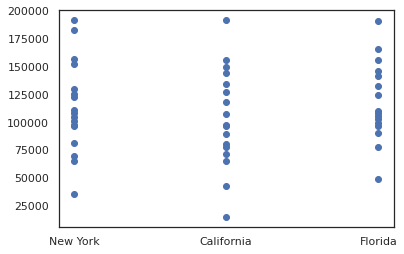

In [ ]:
plt.scatter(x=dataset['State'],y=dataset['Profit'])

On peut afficher le nuage des points à l'aide de la méthode scatter de la librarie matplotlib. Cette figure présente le nuage des points de profit en fonction de R&D spend on peut constater qu'il y'a une forte correlation entre les deux variables profit et r&d spend.

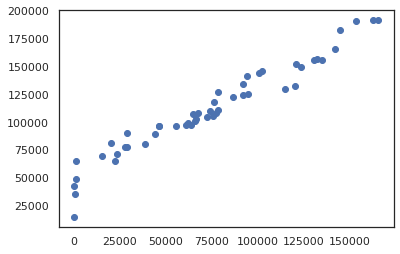

In [ ]:
plt.scatter(x=dataset['R&D Spend'],y=dataset['Profit'])

A l'aide de la méthode regplot fournit par la librarie seaborn, on peut afficher la figure de la correlation entre deux variables et une droite lineaire qui fit le nuage des points.

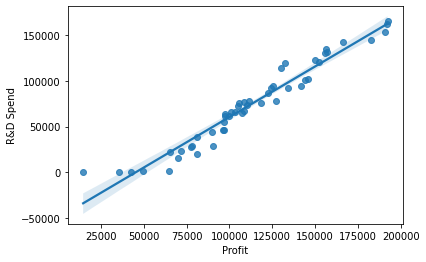

In [ ]:
sns.regplot(x=dataset.Profit,y=dataset["R&D Spend"])

a l'aide de la methode pairplot fournit par seaborn, on peut afficher la nuage des points de chaque couple et des histogrammes dans le diagonale pour visualiser la distribution de chaque variable

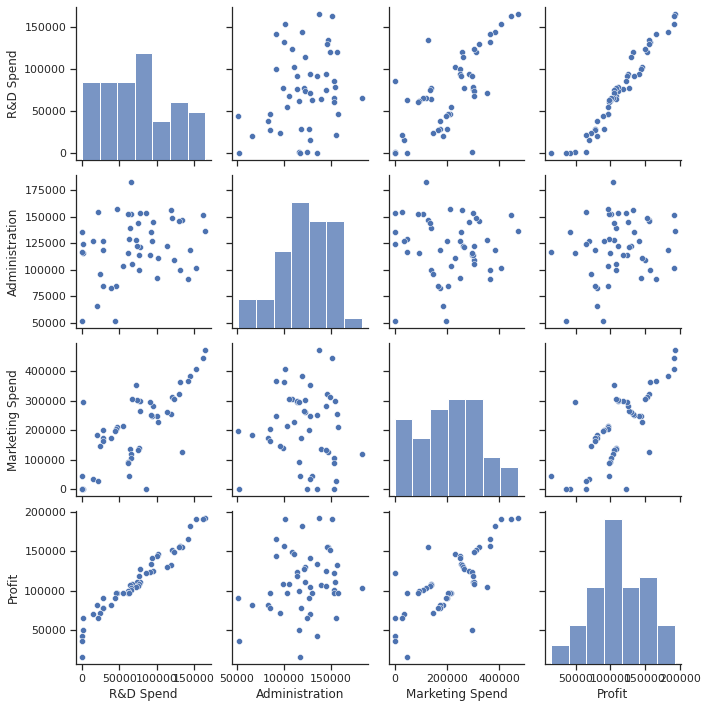

In [ ]:
sns.set(style='ticks')
sns.pairplot(dataset)

# **Nettoyage des données**

In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dataset.isnull().mean()*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

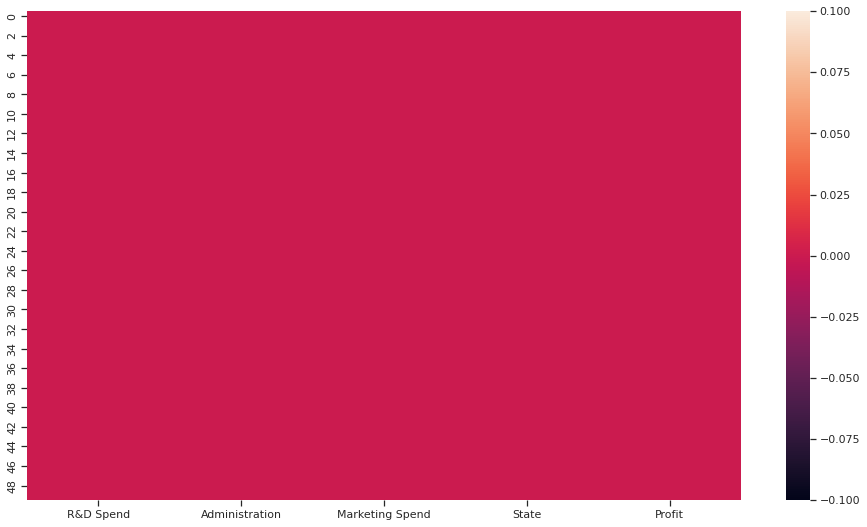

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(dataset.isnull())

In [ ]:
## dropping ALL duplicte values
dataset.drop_duplicates(inplace=True)

In [ ]:
q1=dataset.Profit.quantile(0.25)
q3=dataset.Profit.quantile(0.75)
inf=q1-1.5*(q3-q1)
sup=q3+1.5*(q3-q1)

In [ ]:
dataset[dataset.Profit<inf]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
def finding_outliers(dataset, variable_name):
  iqr = dataset[variable_name].quantile(0.75) - dataset[variable_name].quantile(0.25)
  lower = dataset[variable_name].quantile(0.25) - 1.5 * iqr
  upper = dataset[variable_name].quantile(0.75) + 1.5 * iqr 
  return dataset[(dataset[variable_name] < lower) | (dataset[variable_name] > upper)]

In [ ]:
finding_outliers(dataset, 'Profit').sort_values('Profit')

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


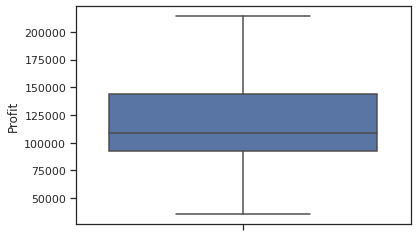

In [ ]:
iqr = dataset['Profit'].quantile(0.75) - dataset['Profit'].quantile(0.25)
dataset['Profit'].quantile(0.75) + 1.5* iqr
dataset.loc[(finding_outliers(dataset, 'Profit').index, 'Profit')] = dataset['Profit'].quantile(0.75) + 1.5 * iqr
sns.boxplot(y = 'Profit', data=dataset);

# **Préparation des données**

Correlation Matrix and Heatmap


avec la methode corr, on peut afficher la valeur de correlation. dans cet example, en utilisant la methode pearson

In [ ]:
correlation=dataset.corr(method='pearson')

In [ ]:
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


une autre presentation des correlation de chaque couple

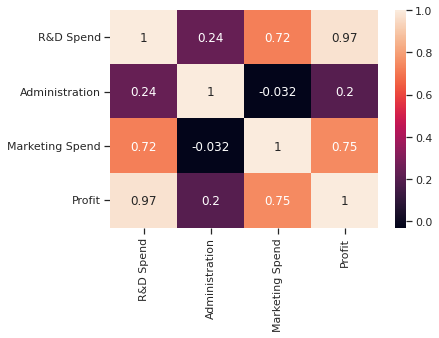

In [ ]:
sns.heatmap(correlation,annot=True)

skew est une coefficient de skiness qui permet de determiner que la distribution est bien symetrique si la valeur est entre [0.5,-0.5] si non il indique que la distribution est fortement biasée.

In [ ]:
dataset.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [ ]:
from scipy.stats import norm

Le distplot représente la distribution des données d'une variable par rapport à la distribution de densité.

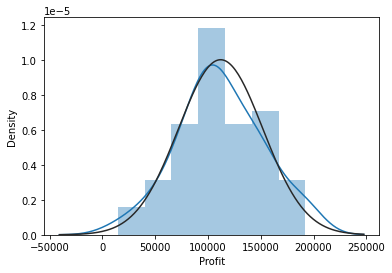

In [ ]:
sns.distplot(dataset.Profit,fit=norm)

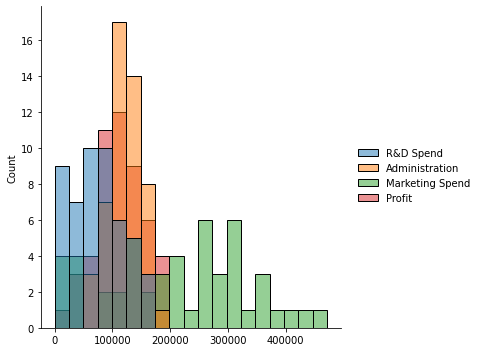

In [ ]:
sns.displot(data=dataset)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X=dataset.iloc[:,0:4].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Y=dataset.iloc[:,4].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X.shape

(50, 4)

In [ ]:
Y.shape

(50,)

In [ ]:
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

Méthode de LabelEncoder:nous aidons a remplaçer la valeur catégorielle par une valeur numérique comprise entre 0 et le nombre de classes moins

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
X[:,3]=label.fit_transform(X[:,3])

In [ ]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
d=ColumnTransformer([('State',OneHotEncoder(),[3])],remainder='passthrough')

In [ ]:
X=d.fit_transform(X)

In [ ]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
X[:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [ ]:
X=X[:,1:]

In [ ]:
X[:5,:]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [ ]:
X1=dataset.iloc[:,0:4]

Convertir les strings vers un nombre binaire parce que se sont des pays non ordinal. le parametre drop_first permet d'"liminer la 1ere colonne car la machine peut distinguer les differentes pays sans la 1ere colonne ce qui permet d'alleger les données.

In [ ]:
X2=pd.get_dummies(data=X1,drop_first=True)

In [ ]:
X2.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
#splitting to test and train sets
from sklearn.model_selection import train_test_split

Diviser les données à l'aide de la methode train_test_split fournit par la librairie sklearn.
la division est comme suit: 80% du data pour training et 20% pour tester sur X et Y
* x_train : 80% des données de la dataframe x
* x_test : 20% des données de la dataframe x
* y_train : 80% des données de la dataframe y
* y_test : 20% des données de la dataframe y

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(40, 6)

In [ ]:
X_test.shape

(10, 6)

In [ ]:
from sklearn.linear_model import LinearRegression

Créer un modéle lineaire à l'aide de la classe LinearRegression fournit par sklearn.

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
regressor.score(X_train,Y_train)

0.9501847627493607

In [ ]:
regressor.intercept_

42554.167617767

In [ ]:
regressor.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [ ]:
Y_pred=regressor.predict(X_test)

In [ ]:
Y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [ ]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9347068473282987

 Ridge et Lasso ajoutent un terme dit de régularisation à la fonction de coût de la régression. Ce terme pénalise la fonction de coût lorsque la somme des valeurs absolues des coefficients augmente.En raison du fait que les coefficients seront réduits vers une moyenne de zéro, les caractéristiques moins importantes d'un ensemble de données sont éliminées lorsqu'elles sont pénalisées. Le rétrécissement de ces coefficients en fonction de la valeur alpha fournie conduit à une certaine forme de sélection automatique des caractéristiques, car les variables d'entrée sont supprimées dans une approche efficace.
Semblable à la régression au lasso, Rudgz impose une contrainte similaire sur les coefficients en introduisant un facteur de pénalité. Cependant, alors que la régression au lasso prend l'amplitude des coefficients, la régression en crête prend le carré.

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)
Y_pred_r=ridge.predict(X_test)
print("R ridge : {}".format(r2_score(Y_test,Y_pred_r)))

R ridge : 0.9220028576023642


In [ ]:
#Lasso regression model
from sklearn.linear_model import Lasso
print("\nLasso Model.\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,Y_train)
train_score_ls =lasso.score(X_train,Y_train)
test_score_ls =lasso.score(X_test,Y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model.

The train score for ls model is 0.9501845216126861
The test score for ls model is 0.9349398990297172


In [ ]:
#Building the optimal model backward elimination(feature selection)
import statsmodels.api as sn
#add a column forwed by 1 to C
X=np.append(arr=np.ones((50,1)),values=X,axis=1)

In [ ]:
X[:5,:]

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.6534920e+05, 1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.6259770e+05, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.5344151e+05, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4437241e+05, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4210734e+05, 9.1391770e+04, 3.6616842e+05]])

In [ ]:
X=X.astype('float64')

In [ ]:
X_opt=X[:,[0,1,2,3,4,5]]

In [ ]:
regressor_OLS=sn.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           3.50e-32
Time:                        20:58:26   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=sn.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.68e-29
Time:                        20:58:29   Log-Likelihood:                -526.81
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.753e+04   3072.973      8.960      0.000    2.13e+04    3.37e+04
x1          2.753e+04   3072.973      8.960      0.000    2.13e+04    3.37e+04
x2          -573.7029   2838.043     -0.202      0.841   -6286.386    5138.981
x3             0.8624      0.030     28.282      0.000       0.801       0.924
x4            -0.0530      0.050     -1.063      0.294      -0.154       0.047
==============================================================================
Omnibus:                       14.902   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.212
Skew:                          -0.964   Prob(JB):                     2.48e-05
Kurtosis:                       5.543   Cond. No.                     2.65e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_opt=X[:,[0,3,4,5]]
regressor_OLS=sn.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.68e-29
Time:                        20:58:31   Log-Likelihood:                -526.81
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.507e+04   6145.947      8.960      0.000    4.27e+04    6.74e+04
x1          -573.7029   2838.043     -0.202      0.841   -6286.386    5138.981
x2             0.8624      0.030     28.282      0.000       0.801       0.924
x3            -0.0530      0.050     -1.063      0.294      -0.154       0.047
==============================================================================
Omnibus:                       14.902   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.212
Skew:                          -0.964   Prob(JB):                     2.48e-05
Kurtosis:                       5.543   Cond. No.                     6.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt=X[:,[0,3,5]]
regressor_OLS=sn.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.372
Time:                        20:58:36   Log-Likelihood:                -599.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.613e+04   2.59e+04      2.942      0.005    2.41e+04    1.28e+05
x1          2555.2116    1.2e+04      0.212      0.833   -2.16e+04    2.68e+04
x2             0.2885      0.205      1.404      0.167      -0.125       0.702
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.139
Skew:                           0.099   Prob(JB):                        0.933
Kurtosis:                       2.835   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt=X[:,[0,3]]
regressor_OLS=sn.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sun, 16 Oct 2022   Prob (F-statistic):              0.829
Time:                        20:58:38   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
x1          2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=1)
r.fit(X_train,Y_train)
pred_r=r.predict(X_test)
pred_r

array([106374.693, 129016.988, 129986.95 ,  79938.452, 184680.004,
       110524.268,  63384.809,  99002.83 , 111844.036, 172289.938])

In [ ]:
r2_score(Y_test,pred_r)

0.9266550326630539

Elbow method

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

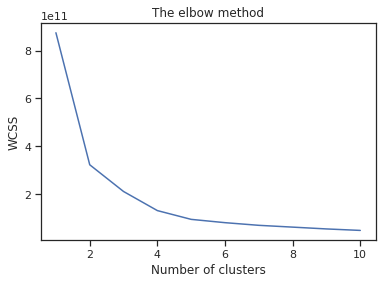

In [ ]:
# Plotting the results onto a line graph 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# **Modélisation**

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(Y_test, Y_pred)
meanSqErr = metrics.mean_squared_error(Y_test, Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('R squared: {:.2f}'.format(r2_score(Y_test,Y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 93.47
Mean Absolute Error: 7514.293659636814
Mean Square Error: 83502864.03250548
Root Mean Square Error: 9137.990152791011


Avec une précesion de 94%. on peut assumer que c'est un bon modele